# Lab 4 - Discretization


using kaggle.json file from the first lab, load this lab's data:

You suppose to have 1 file:

imdb-data.zip

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d PromptCloudHQ/imdb-data
! unzip imdb-data.zip

100% 134k/134k [00:00<00:00, 442kB/s]
100% 134k/134k [00:00<00:00, 441kB/s]
Archive:  imdb-data.zip
  inflating: IMDB-Movie-Data.csv     



Discretization is processs of taking continuous  variables and transforming them into discrete  variables.

Wannna know why? read more [here](https://medium.com/codex/data-discretization-b5faa2b77f06)


In this Lab we will apply two basic **unsupervised** discretization methods using pandas, and one **supervised** method.


## About the data

The dataset hold the [Top '06 - '16 Films from IMDB](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data). 


Today we will try discretization methods on the numerical attributes of the dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDB-Movie-Data.csv' , index_col=  'Rank')
numeric_att = ['Year', 'Runtime (Minutes)' ,	'Rating' ,	'Votes' ,	'Revenue (Millions)' ,	'Metascore']
df[numeric_att] = df[numeric_att].apply(pd.to_numeric, errors = 'coerce')
df.head(5)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


The current distribution of the **'Revenue (Millions)'** attribute is:

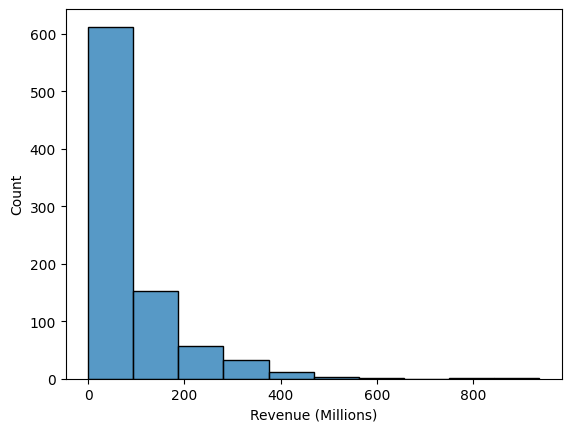

In [4]:
g = sns.histplot(data=df, x='Revenue (Millions)' , bins=10)

##**Unsupervised Discretization Methods**

Many Methods exists, we will explore two basic ones - Equal width and Equal frequency.



##**Equal Width**

Split the numeric attribute to n bins - every bin should have the same length.




## Task 1:

using pandas [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) method, split the **'Revenue (Millions)'** attribute into Equal width bins of size 10.

Hint - That exactly what sns.histplot does, as plotted above.

Print the resulting bins thresholds.

In [11]:
splitted_rev, bins_rev = pd.cut(df['Revenue (Millions)'], 10, retbins=True)
bins_rev

array([ -0.93663,  93.663  , 187.326  , 280.989  , 374.652  , 468.315  ,
       561.978  , 655.641  , 749.304  , 842.967  , 936.63   ])



##**Equal Frequency**

Split the numeric attribute to n bins - every bin should be the **same size** (number of records).

Take notice - the bins should be approximately the same size, usually the data isn't rich enough for equal partition.


## Task 2:

using pandas [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) method, split the Stars attribute into 10 Equal frequency bins.

Plot the resulting bins.

In [13]:
splitted_rate, bins_rate = pd.qcut(df['Rating'], 10, retbins=True)
bins_rate

array([1.9, 5.5, 6. , 6.3, 6.6, 6.8, 7. , 7.3, 7.5, 7.9, 9. ])

In [34]:
df['splitted_rate'] = splitted_rate.apply(lambda x: x.mid).values

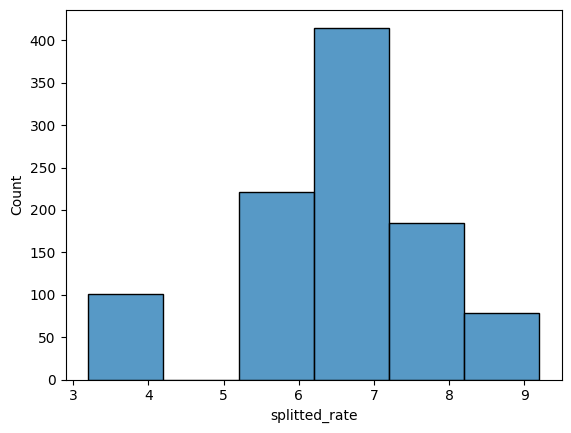

In [40]:
g = sns.histplot(data=df, x='splitted_rate', bins=10)

## Task 3:

Pandas cut method can split numerical attributes to non - equal bins. 


Transform the **Rating** to be discrete, using pandas cut method.
The new labels should be:

*   [0, 5] → 'bad'
*   (5, 7.5] → 'mid'
*   (8, 10] → 'great'

Hint - use bins and labels arguments.


In [43]:
splitted_rating, bins_rating = pd.cut(df['Rating'], bins=3,
                                       labels=['bad', 'mid', 'great'], retbins=True)
bins_rating

array([1.8929    , 4.26666667, 6.63333333, 9.        ])

In [44]:
splitted_rating

Rank
1       great
2       great
3       great
4       great
5         mid
        ...  
996       mid
997       mid
998       mid
999       mid
1000      mid
Name: Rating, Length: 1000, dtype: category
Categories (3, object): ['bad' < 'mid' < 'great']

##Supervised

A basic step in the Info-Fuzzy Network construciton procedure is the Conditional Mutual Information calculation per Node.

The procedure finds the best threhold to split an ordinal attribute based on the target attribute.



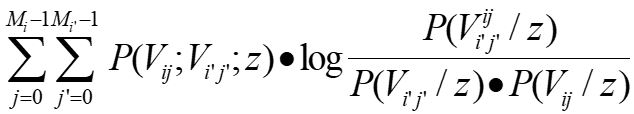

Below is a code snippet that calculates the Conditional Mutual Information between an input and output columns.

In [45]:
import numpy as np
def mutual_information(data, input, target):

        mi = 0

        # Calculate frequency table of X, Y, and XY
        P_X = data.groupby(input).size()
        P_X = P_X/P_X.sum()

        P_Y = data.groupby(target).size()
        P_Y = P_Y/P_Y.sum()

        P_XY = data.groupby([input,target]).size()
        P_XY = P_XY/P_XY.sum()
        # Calculate Mutual Information
        for ind in P_XY.index:

            x_ind = pd.Index((ind[0],), name = input)
            y_ind = pd.Index((ind[1],), name = target) 
            xy_ind = pd.MultiIndex.from_tuples([ind], names =[input,target])
            
            if P_XY[xy_ind].item() != 0 : 
              mi += P_XY[xy_ind].item() * np.log2(P_XY[xy_ind].item()/(P_X[x_ind].item() * P_Y[y_ind].item()))
              
        return mi

Whom parameters are:


*   data - pandas DataFrame
*   input, target - strings, names of the input and target columns respectivly.

Running Example, based on Loan attributes from Classes:

In [47]:
#Building the arrays in accordance with the occurance frequencies
a , b, c, d = 306 , 23 , 77 , 284

input = [0] * (a+b) + [1] * (c + d)
target = [0] * a + [1] * b + [0] * c + [1] *d

#inserting into a dataset
data = pd.DataFrame([] , columns =['input' , 'target'])
data['input'] = input
data['target'] = target

##Calculating mutual information
mutual_information(data , 'input' , 'target')

0.42570942667282563

## Task 4:

Use the supplied code to predict the best split value of the **'Runtime (Minutes)'** attribute based on the target attribute - the **transformed Rating** attribute.

print the threshold value, and the mutual information.


Advice - 
*   Iterate over all distinct values in the input attribute
*   transform a copy of the input attribute to a binary attribute - based on the threshold.





In [48]:
df['splitted_rating'] = splitted_rating

In [49]:
input_attr = 'Runtime (Minutes)'
target_attr = 'splitted_rating'

best_mi = 0
best_threshold = None

for threshold in df[input_attr].unique():
    df['binary_input'] = np.where(df[input_attr] >= threshold, 1, 0)

    mi = mutual_information(df, 'binary_input', target_attr)

    if mi > best_mi:
        best_mi = mi
        best_threshold = threshold

In [50]:
print(f"Best threshold value: {best_threshold}")
print(f"Mutual information: {best_mi}")

Best threshold value: 116
Mutual information: 0.06823575966085552


## Task 5:
Convert the notebook into html:


1.   Download the notebook by clicking the File tab
2.   Upload it to this environment
3.   Run the command:

In [ ]:
%%shell
jupyter nbconvert --to html Lab4.ipynb

[NbConvertApp] WARNING | pattern 'Lab4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execut

CalledProcessError: ignored